In [73]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Tensorflow
# import tensorflow as tf
# from tensorflow import keras

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.utils.vis_utils import plot_model


In [74]:
#convertir un csv en un dataframe
df = pd.read_csv("diabetes.csv")

In [75]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature description

Pregnancies: Número de veces embarazada.

Glucose: Concentración de Glucosa en Plasma a las 2 Horas en una Prueba de Tolerancia Oral a la Glucosa (GTT).

BloodPressure: Presión Arterial Diastólica (mm Hg).

SkinThickness: Grosor del Pliegue Cutáneo del Tríceps (mm).

Insulin: Insulina en Suero a las 2 Horas (µU/ml).

BMI: Índice de Masa Corporal (Peso en kg / (Altura en cm)^2).

DiabetesPedigreeFunction: Función de Pedigrí de Diabetes.

Age: Edad (años).

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


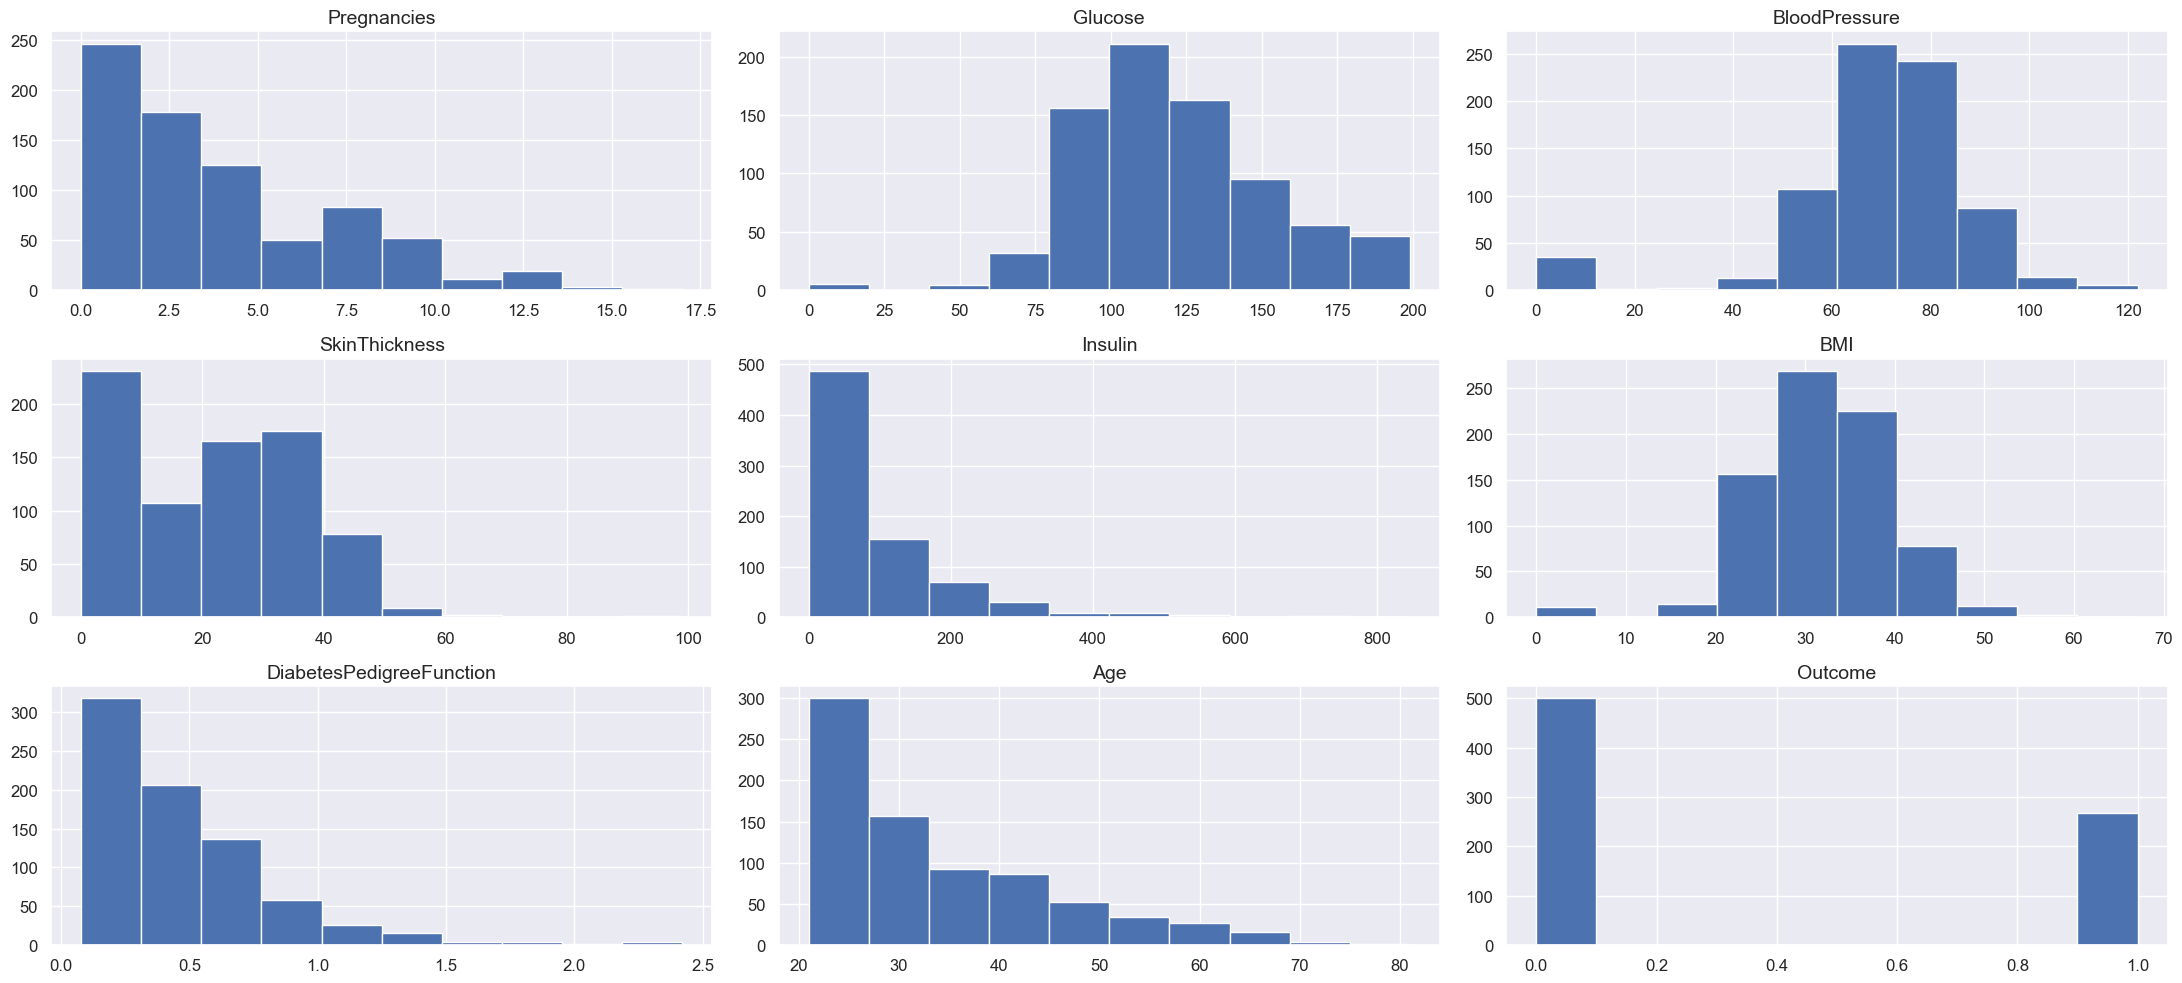

In [78]:
def display_dataset_distributions(dataset,bins=10,figsize=(22,10)):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12 ,figsize=figsize, bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
    
display_dataset_distributions(df)

Outcome
0    500
1    268
Name: count, dtype: int64


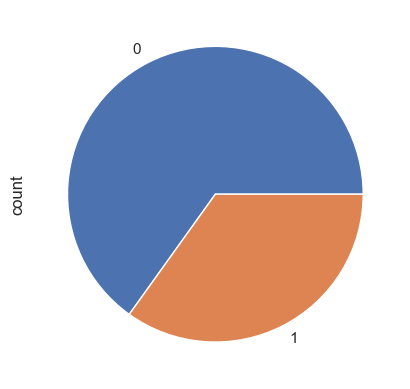

In [79]:
df.Outcome.value_counts().plot(kind ='pie')
print(df.Outcome.value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


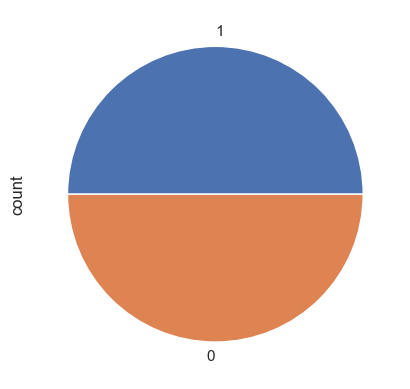

In [80]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# Add extra samples of minority class (Potability=1)
df_upsampled = resample(df[df['Outcome']==1], replace = True, 
                            n_samples = df.Outcome.value_counts().max()-df.Outcome.value_counts().min()) 

df = pd.concat([df, df_upsampled]) 
df = shuffle(df)

df.Outcome.value_counts().plot(kind ='pie')
print(df.Outcome.value_counts())

In [81]:
from sklearn.model_selection import train_test_split

df = df[df['Outcome'].notna()]

y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Outcome'], axis=1),
    y,
    test_size=0.15,
    random_state=0,
    stratify=y
    )

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("% of Outcome in original dataset: "+str((df['Outcome']==1).sum()/df.shape[0]*100))
print("% of Outcome in y_train: "+str((y_train==1).sum()/y_train.shape[0]*100))
print("% of Outcome in y_test: "+str((y_test==1).sum()/y_test.shape[0]*100))

X_train.shape, X_test.shape = 
(850, 8) (150, 8)
% of Outcome in original dataset: 50.0
% of Outcome in y_train: 50.0
% of Outcome in y_test: 50.0


In [82]:
# Join it to work easier
X_train['Outcome']=y_train
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
643,4,90,0,0,0,28.0,0.610,31,0
225,1,87,78,27,32,34.6,0.101,22,0
101,1,151,60,0,0,26.1,0.179,22,0
641,4,128,70,0,0,34.3,0.303,24,0
558,11,103,68,40,0,46.2,0.126,42,0
...,...,...,...,...,...,...,...,...,...
220,0,177,60,29,478,34.6,1.072,21,1
759,6,190,92,0,0,35.5,0.278,66,1
586,8,143,66,0,0,34.9,0.129,41,1
122,2,107,74,30,100,33.6,0.404,23,0


In [83]:
print('% of NaN in each column')
print(((1-df.count()/df.count().max())*100))

% of NaN in each column
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


C:\Users\cbureu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


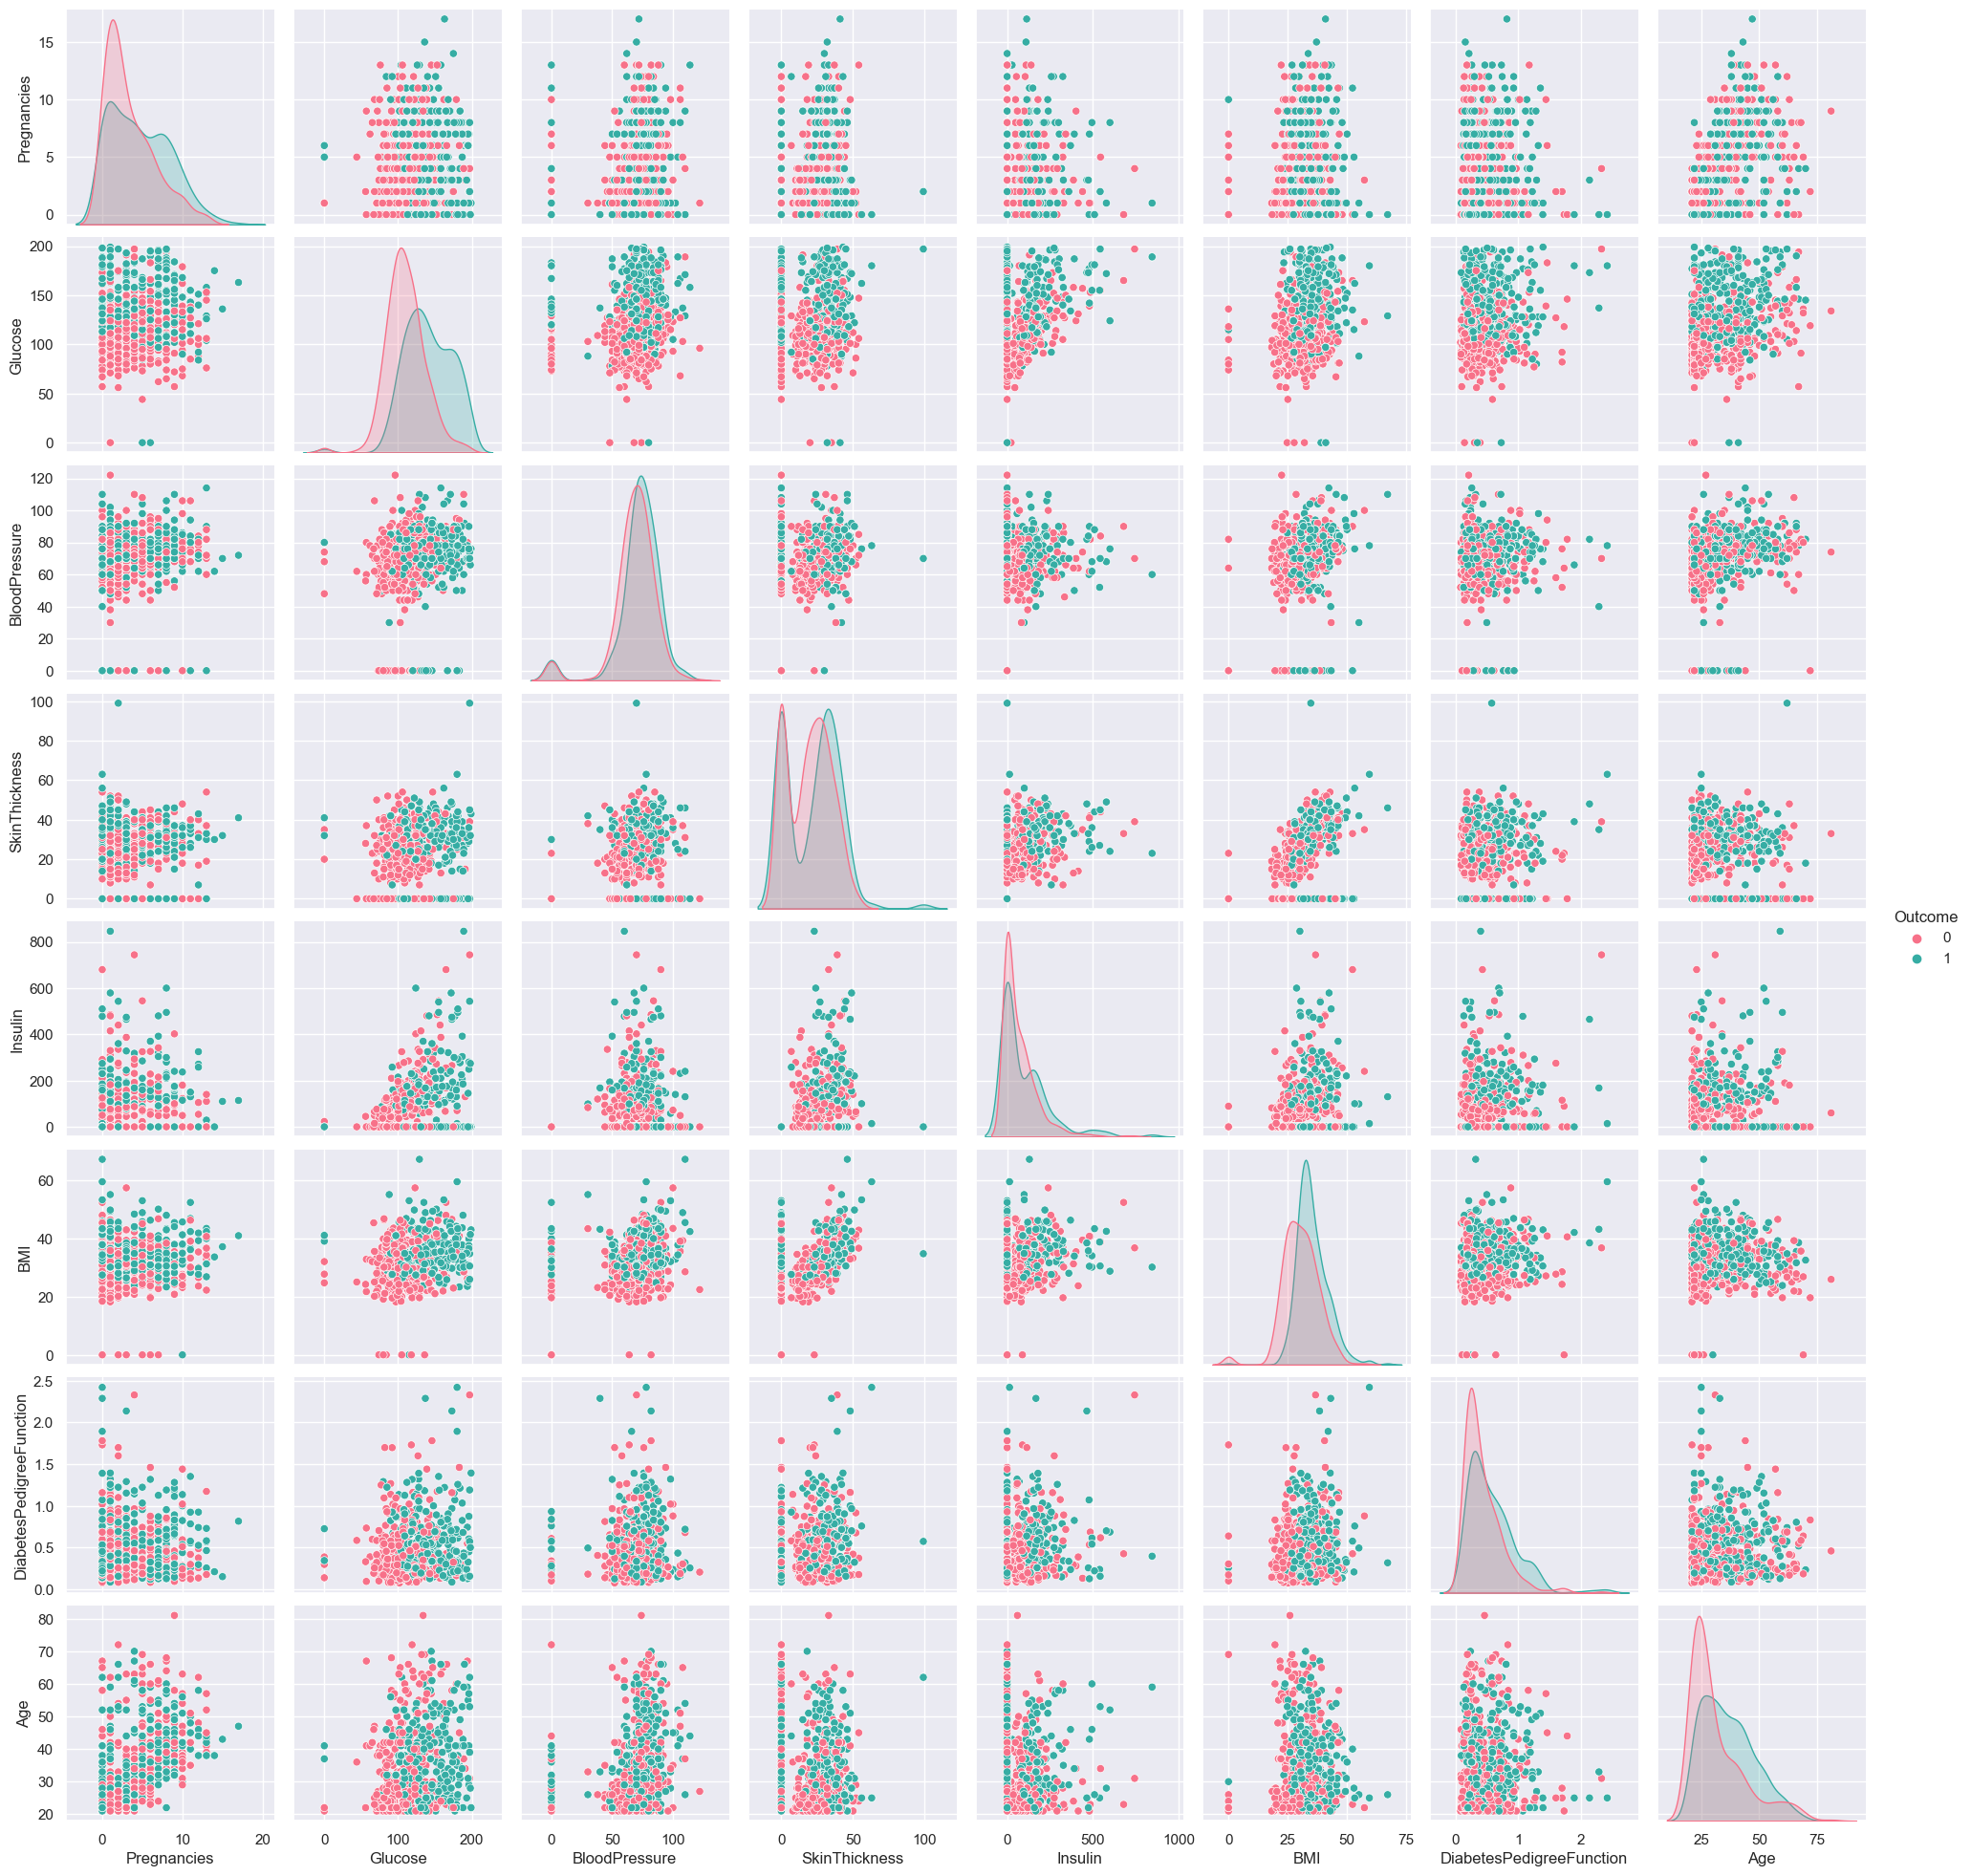

In [61]:
sns.pairplot(X_train,hue="Outcome",palette="husl")

## Outliers

In [84]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

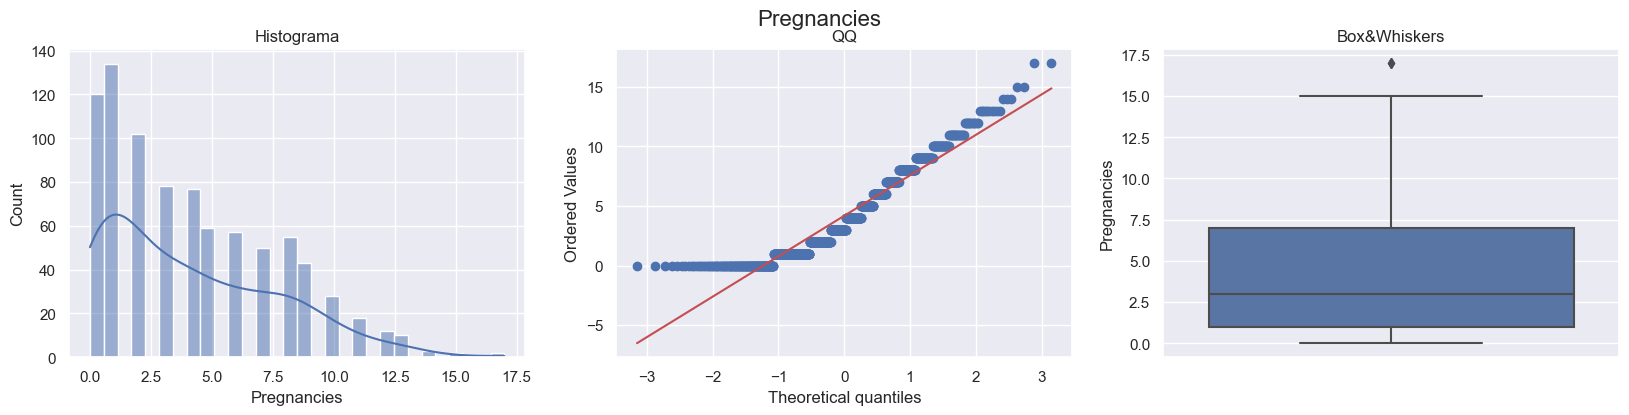

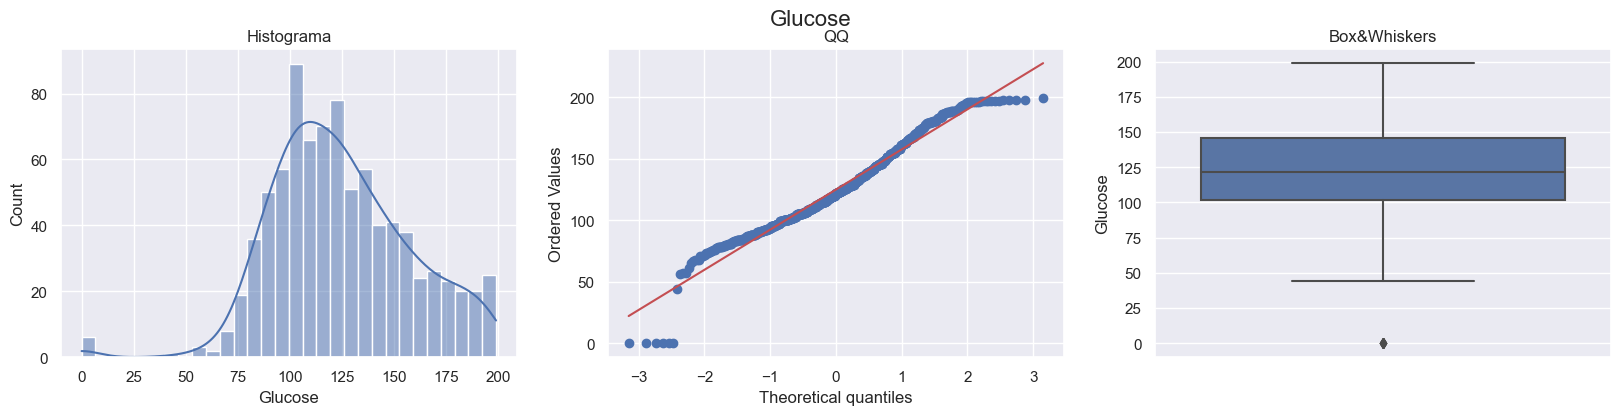

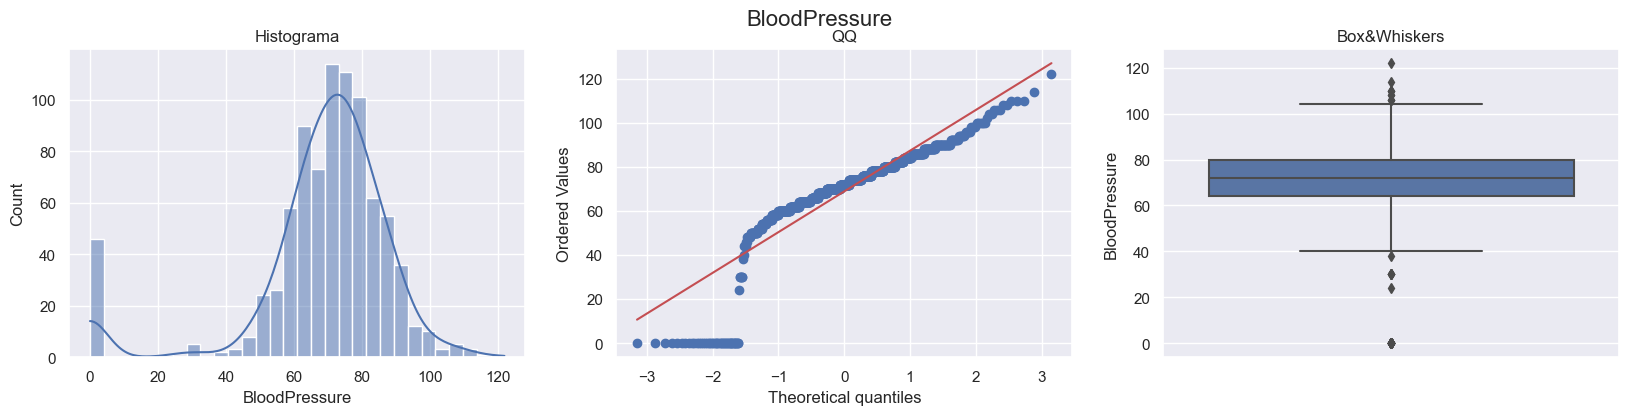

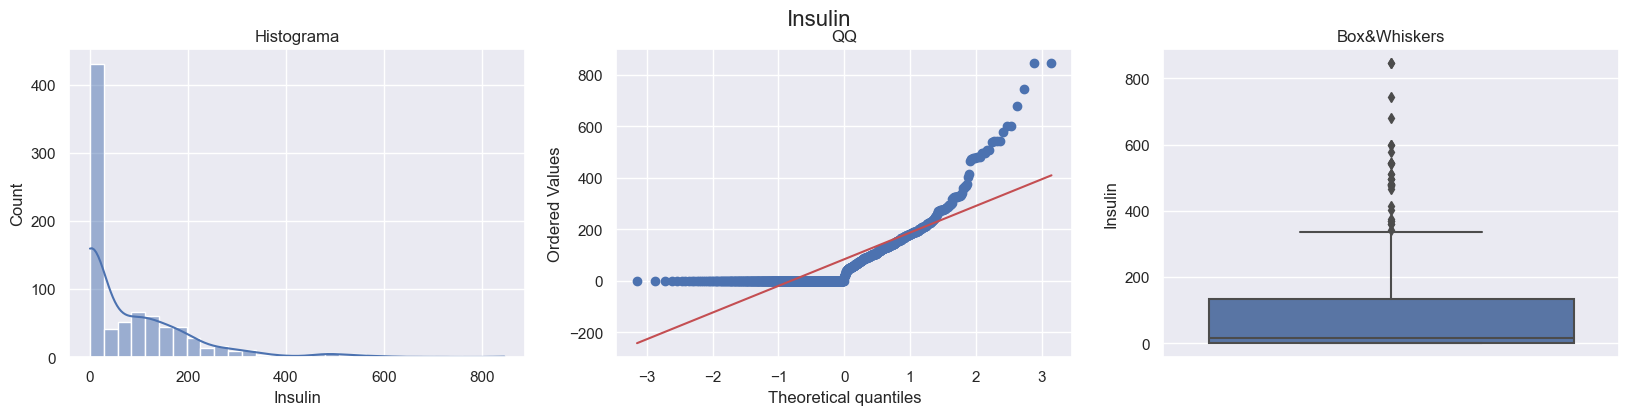

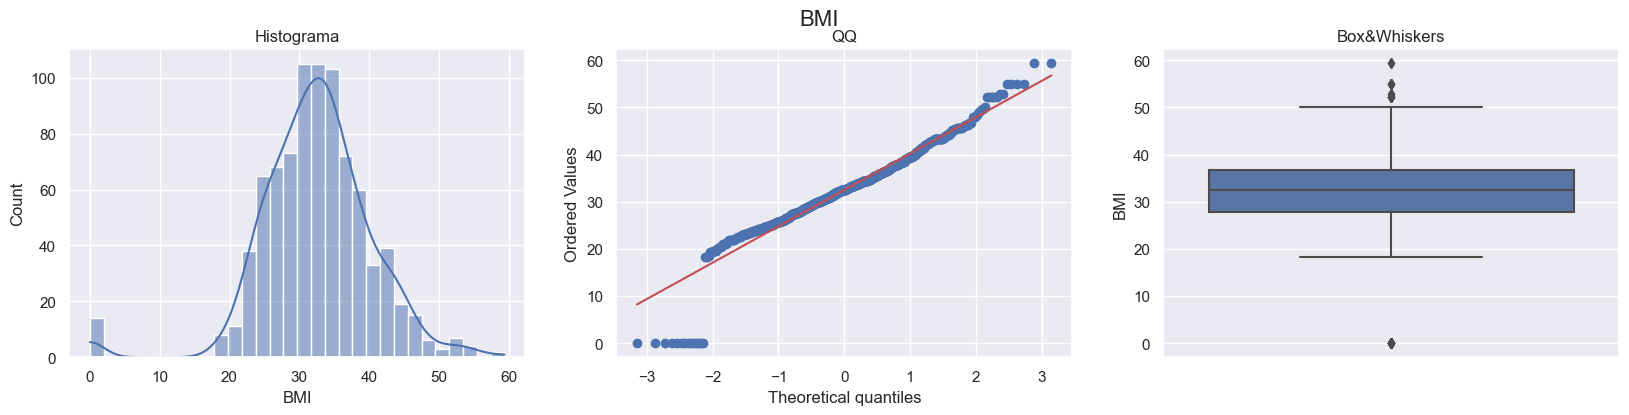

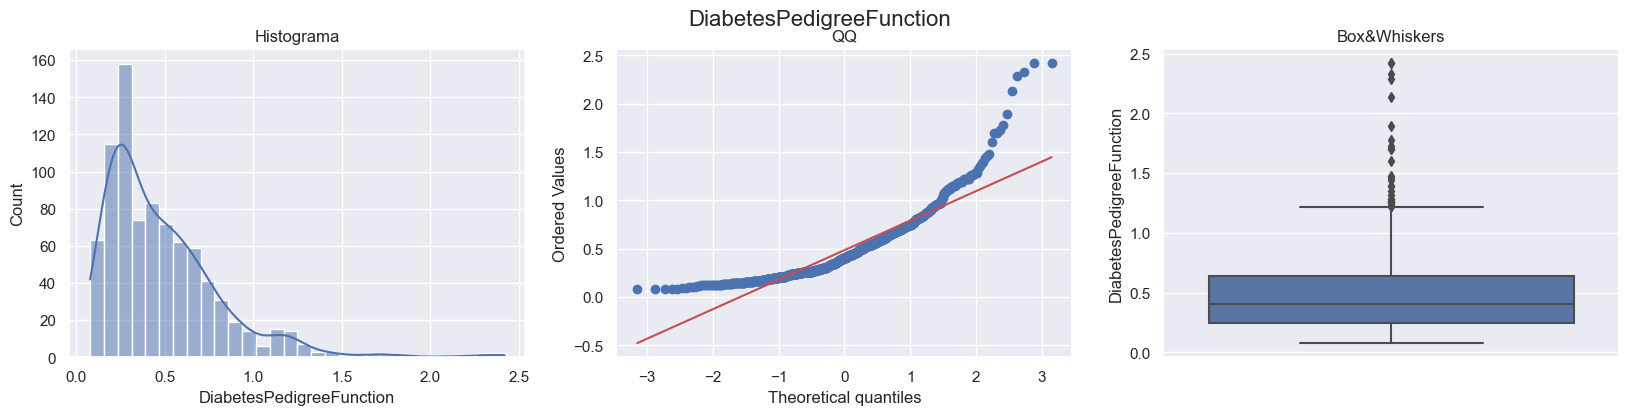

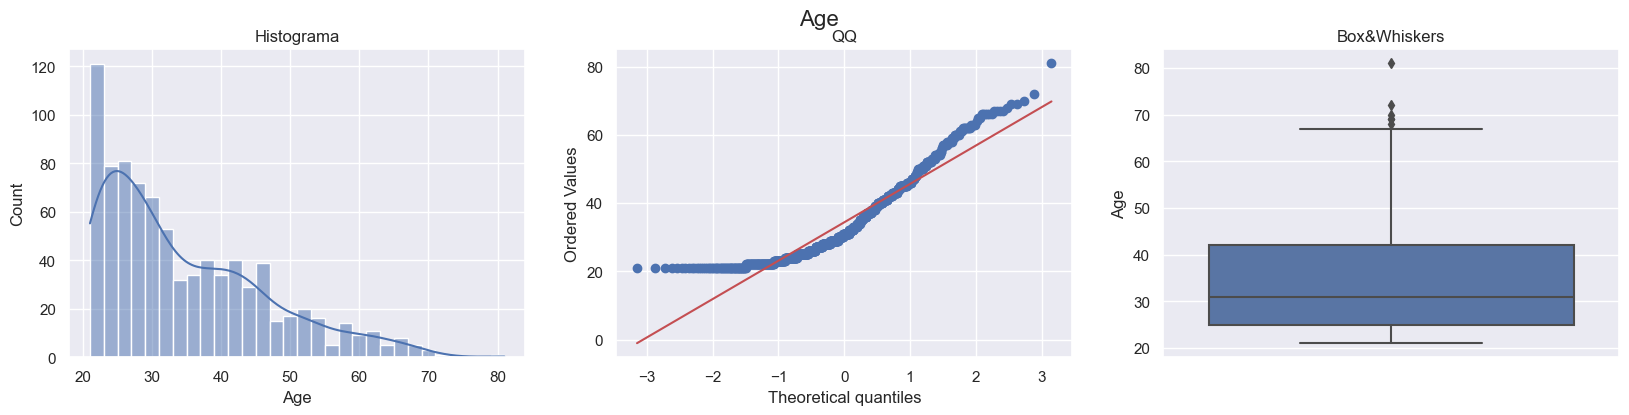

In [85]:
norm_col = [
    'Pregnancies',
    'Glucose', 
    'BloodPressure', 
    'Insulin', 
    'BMI',
    'DiabetesPedigreeFunction', 
    'Age'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [87]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
    
def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

Pregnancies outliers = 0
Glucose outliers = 6
BloodPressure outliers = 57
Insulin outliers = 26
BMI outliers = 22
DiabetesPedigreeFunction outliers = 17
Age outliers = 1
Total outliers = 111


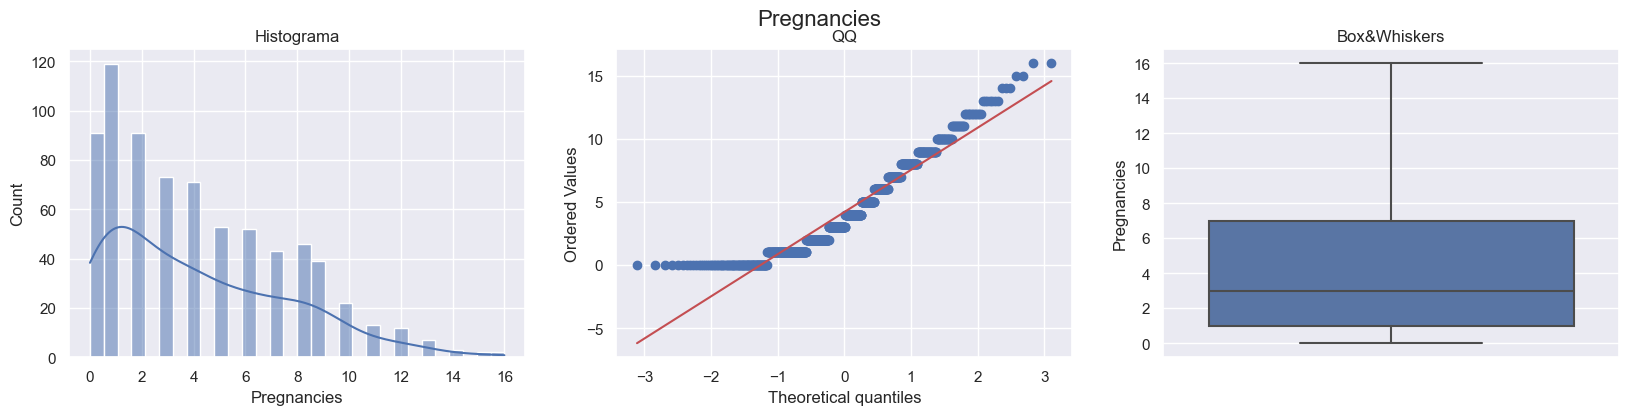

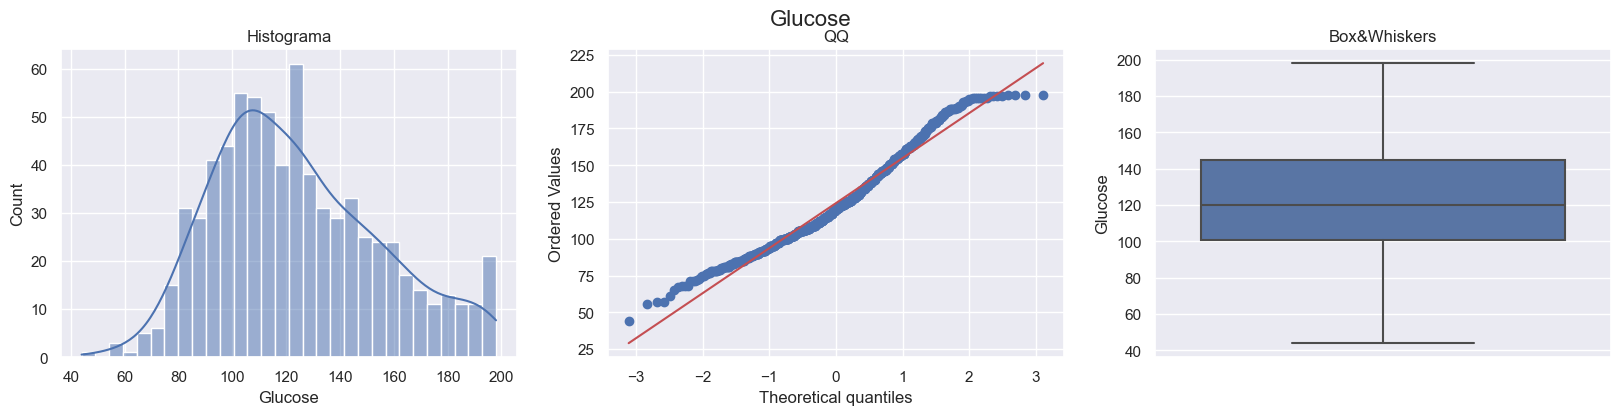

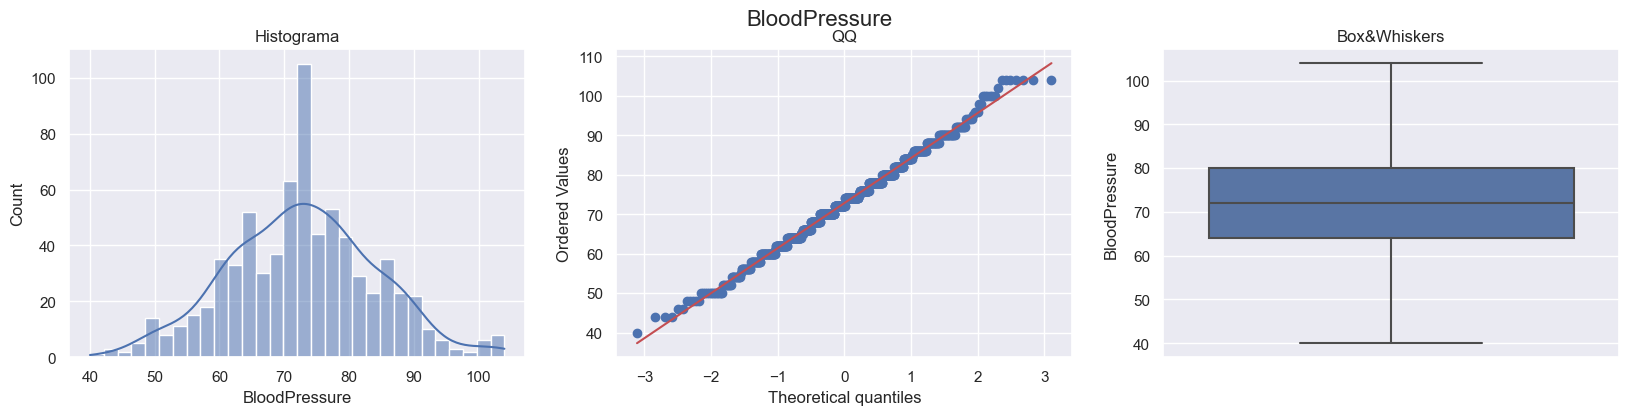

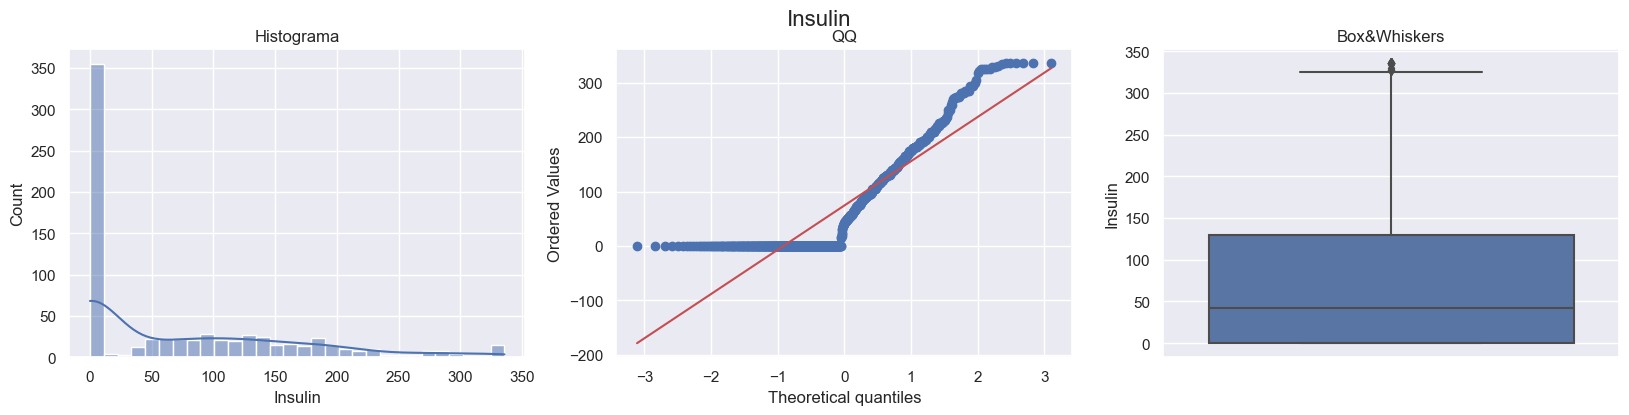

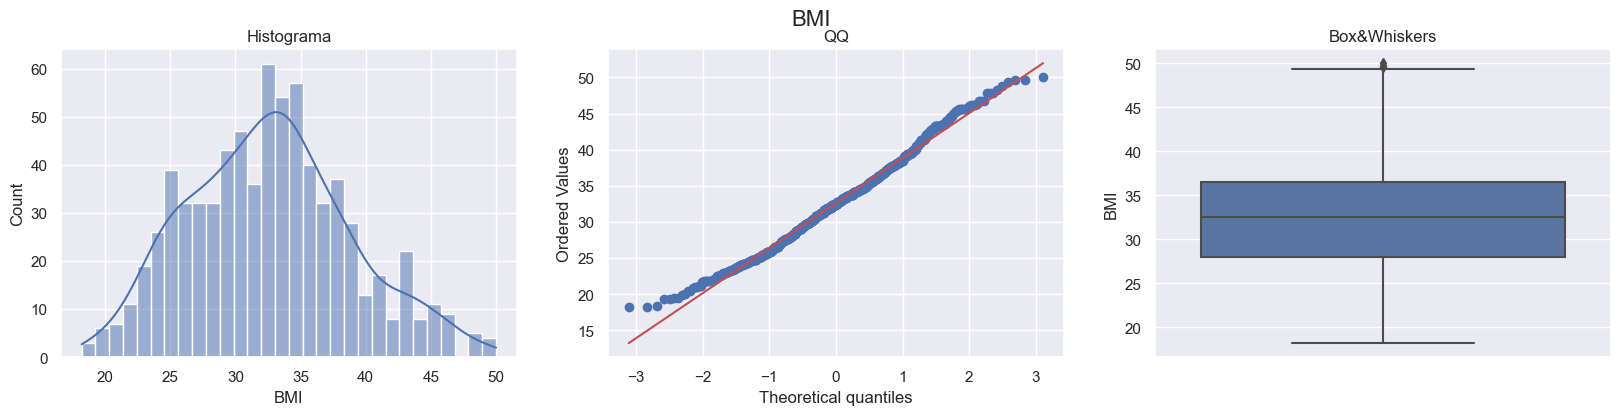

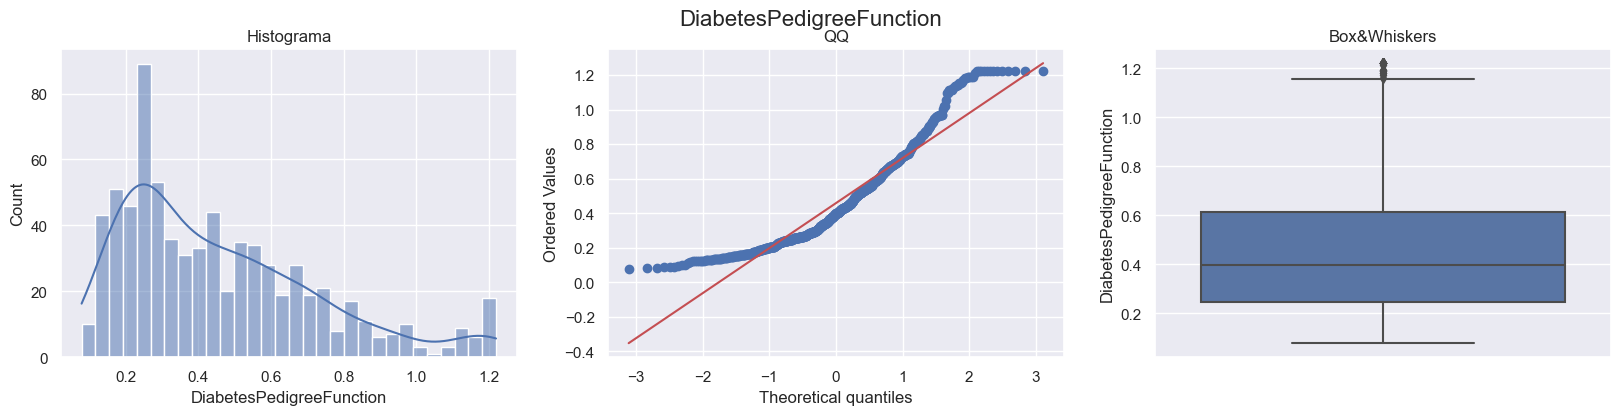

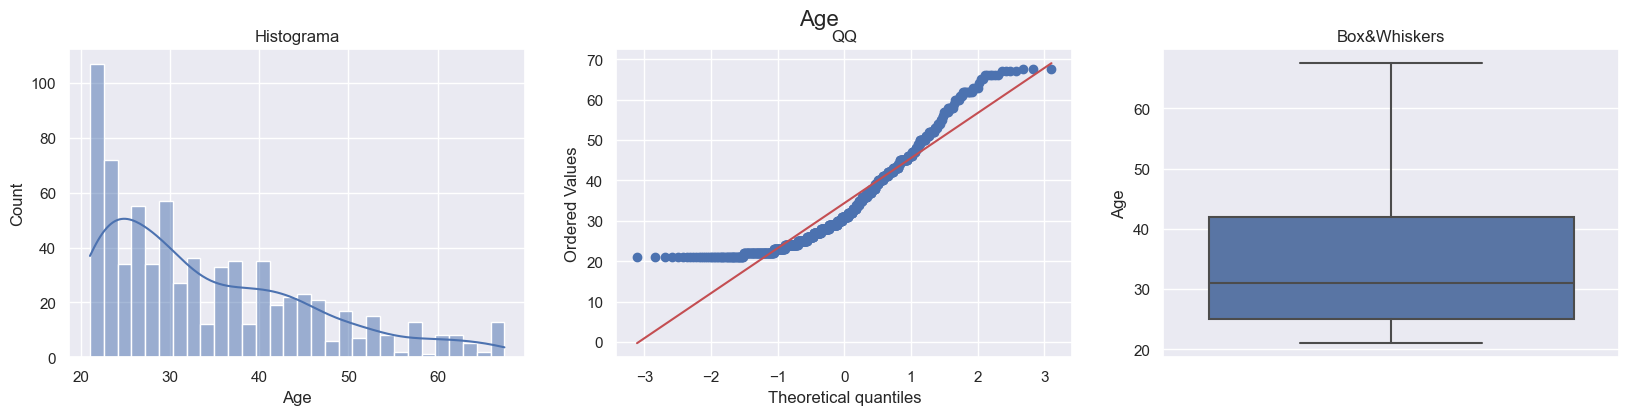

In [88]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

<Axes: >

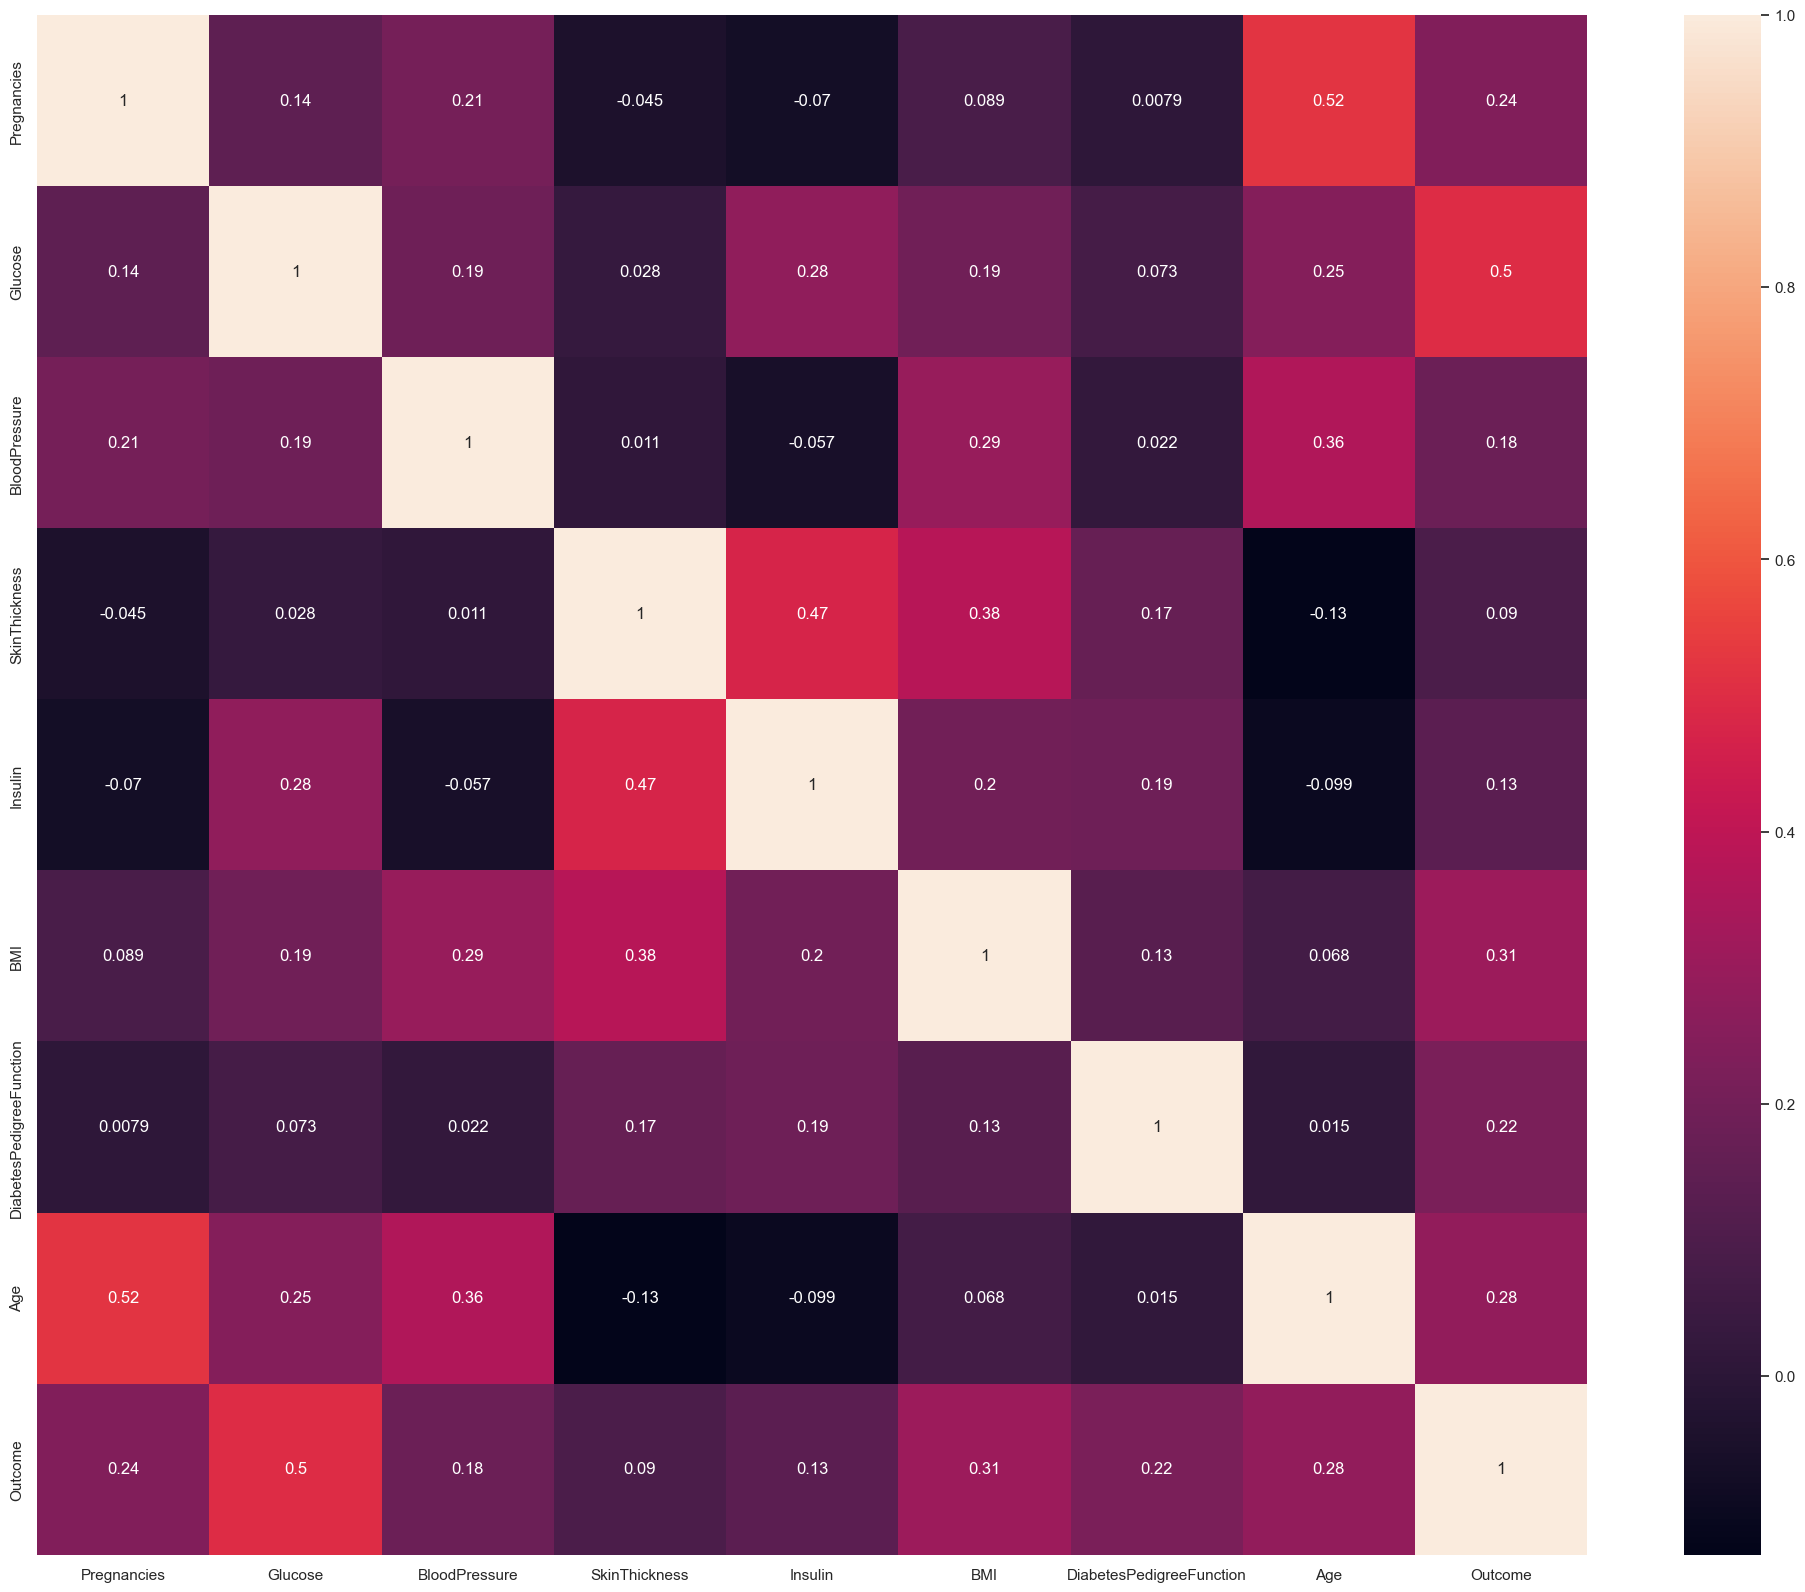

In [89]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(), annot=True)

## Modelos y evaluación


In [90]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

In [101]:
y_train = X_train['Outcome']

X = X_train.drop(['Outcome'], axis=1)
y = y_train    
print(len(y_train))
print(len(X_train))
print(len(y))
print(len(X))

739
739
739
739


In [105]:
X = X_train.drop(['Outcome'], axis=1)
y = y_train               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.1, shuffle=True, stratify=y_train)

print("Train:", len(X_train))
print("Tests:", len(X_test))
print("Validation:", len(X_val))

Train: 531
Tests: 148
Validation: 60


In [106]:
def evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=False, Scale=False, Model='logistic'):
    if Scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    if PCA_Model:
        pca = PCA(n_components=0.9).fit(X_train)
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        X_test = pca.transform(X_test)

    if Model == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif Model == 'logistic_cv':
        model = LogisticRegressionCV(max_iter=1000)
    elif Model == 'random_forest':
        model = RandomForestClassifier()
    elif Model == 'gradient_boosting':
        model = GradientBoostingClassifier()
    elif Model == 'svm':
        model = SVC()
    elif Model == 'knn':  
        model = KNeighborsClassifier()
    elif Model == 'decision_tree_classifier':  
        model = DecisionTreeClassifier()
    else:
        raise ValueError("Model type not recognized")

    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    #sns.histplot(data=y_pred_val)

    accuracy_val = accuracy_score(y_pred_val, y_val)
    precision_val = precision_score(y_pred_val, y_val)
    recall_val = recall_score(y_pred_val, y_val)
    f1_val = f1_score(y_pred_val, y_val)

    metrics_val_df = pd.DataFrame({
        'Modelo': [Model],
        'PCA': [PCA_Model],
        'Scale': [Scale],
        'Accuracy': [accuracy_val],
        'Precision': [precision_val],
        'Recall': [recall_val],
        'F1': [f1_val]
    })

    accuracy_test = accuracy_score(y_pred_test, y_test)

    return metrics_val_df


In [107]:
df_result = pd.DataFrame()

df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='logistic')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='logistic_cv')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='random_forest')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='gradient_boosting')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='svm')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='knn')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, PCA_Model=True, Scale=True, Model='decision_tree_classifier')], ignore_index=True)

print(df_result)

                     Modelo   PCA  Scale  Accuracy  Precision    Recall  \
0                  logistic  True   True  0.733333   0.724138  0.724138   
1               logistic_cv  True   True  0.716667   0.689655  0.714286   
2             random_forest  True   True  0.850000   0.862069  0.833333   
3         gradient_boosting  True   True  0.783333   0.793103  0.766667   
4                       svm  True   True  0.783333   0.758621  0.785714   
5                       knn  True   True  0.733333   0.689655  0.740741   
6  decision_tree_classifier  True   True  0.800000   0.862069  0.757576   

         F1  
0  0.724138  
1  0.701754  
2  0.847458  
3  0.779661  
4  0.771930  
5  0.714286  
6  0.806452  


## Neural Network